In [ ]:
# Import depedencies 
import pandas as pd
import numpy as np 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression 
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Loading Data 
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.shape

(1338, 7)

In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
# Checking Missing Data  
df.isnull().sum().max()
# There's No Missing Values 

0

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


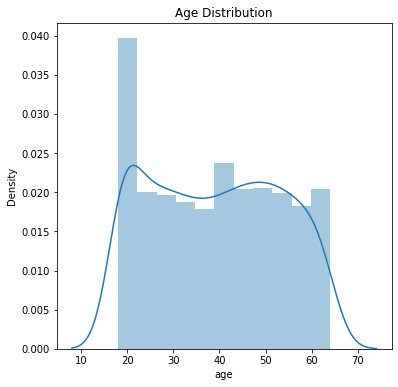

In [ ]:
#Age Distribution 
plt.figure(figsize=(6,6))
sns.distplot(df['age'])
plt.title('Age Distribution')
plt.show()

Traiting Categorical data

In [ ]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [ ]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

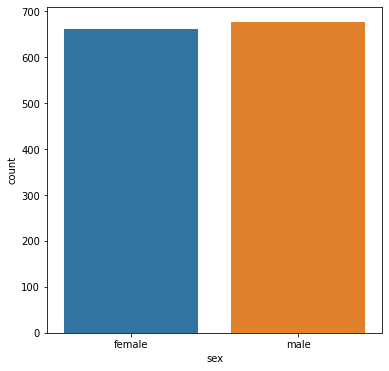

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x='sex', data = df )
plt.show()

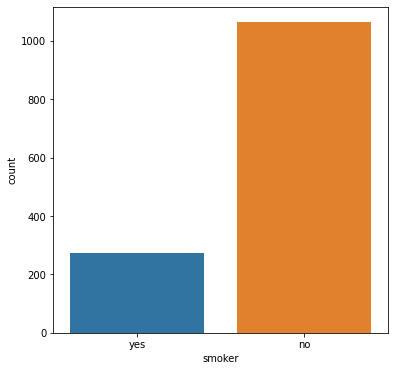

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x='smoker', data = df )
plt.show()

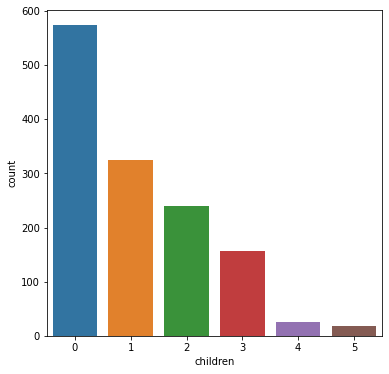

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x='children', data = df )
plt.show()

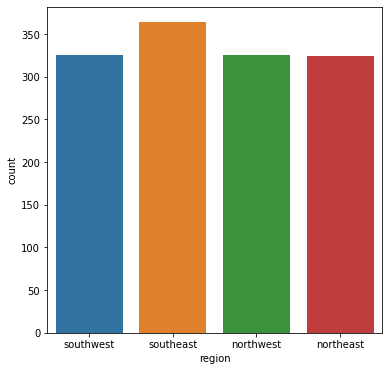

In [ ]:
plt.figure(figsize = (6,6))
sns.countplot(x='region', data = df )
plt.show()

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


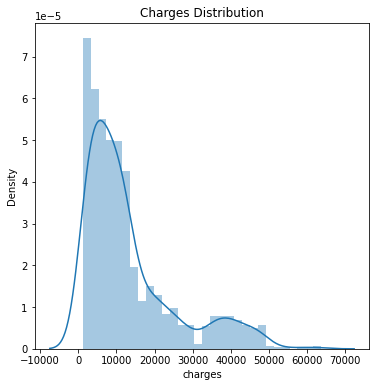

In [ ]:
# Distribution of Charges 
plt.figure(figsize=(6,6))
sns.distplot(df['charges'])
plt.title('Charges Distribution')
plt.show()

In [ ]:
# Encoding Categorical Data 
df.replace({'sex':{'female':0,'male':1}, 'region' :{'southeast':0, 'southwest':1,'northwest':2,'northeast':3 }, 'smoker':{'no':0,'yes':1}},inplace =  True)

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [ ]:
  # Separate Features and Target 
  X = df.drop('charges',axis=1)
  Y = df['charges']

In [ ]:
# Splitting Data on Train Test 
X_train, X_test, Y_train , Y_test = train_test_split(X,Y,test_size = .2,random_state = 0)

In [ ]:
#Create and fit Model 
regressor = LinearRegression()

In [ ]:
regressor.fit(X_train,Y_train)

LinearRegression()

In [ ]:
predictions = regressor.predict(X_test)

In [ ]:
# Evaluate the model 
print('R2 score : ',metrics.r2_score(predictions,Y_test))

R2 score :  0.7260191158322691
